In [8]:
! swig -c++ -python swig/poisson_mg.i
! python3 swig/setup.py build_ext --inplace

running build_ext
building '_poisson_mg' extension
arm-linux-gnueabihf-gcc -pthread -DNDEBUG -g -fwrapv -O2 -Wall -g -fstack-protector-strong -Wformat -Werror=format-security -Wdate-time -D_FORTIFY_SOURCE=2 -fPIC -I/usr/include/python3.7m -c swig/poisson_mg_wrap.cxx -o build/temp.linux-armv7l-3.7/swig/poisson_mg_wrap.o -I./ -std=c++11 -O3 -Wno-psabi
arm-linux-gnueabihf-g++ -pthread -shared -Wl,-O1 -Wl,-Bsymbolic-functions -Wl,-z,relro -Wl,-z,relro -g -fstack-protector-strong -Wformat -Werror=format-security -Wdate-time -D_FORTIFY_SOURCE=2 build/temp.linux-armv7l-3.7/swig/poisson_mg_wrap.o -o /home/pi/git/CompPhys/PDEs/_poisson_mg.cpython-37m-arm-linux-gnueabihf.so


In [9]:
import sys
import os
sys.path.append( os.path.abspath("swig") )

In [10]:
from mpl_toolkits.mplot3d import Axes3D 
import poisson_mg
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import time

In [21]:
acc = 1e-6
L = 16
h = 1/(L+1)
rho = np.zeros( (L,L))
rho[L//2,L//2] = 10./h**2
pmg = poisson_mg.poisson_mg_double(rho, acc, L)

In [29]:
#t1 = time.perf_counter()
%timeit -r 1 -n 10 pmg.execute()
# t2 = time.perf_counter()
#print("time elapsed = ", (t2-t1))

5.09 µs ± 0 ns per loop (mean ± std. dev. of 1 run, 10 loops each)


Text(0.5, 0, 'y')

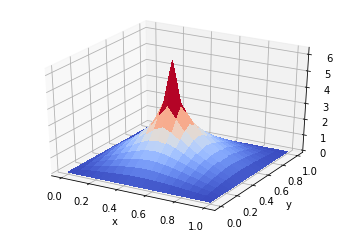

In [13]:
%matplotlib inline
a = pmg.get_psi()
# Define the axes
x = np.arange(0, h*(L+2), h)
y = np.arange(0, h*(L+2), h)
# Get the grid
X, Y = np.meshgrid(x, y)
# Set Z to the poisson V[i][j]
Z = np.array( a )

fig = plt.figure(1)
ax = fig.gca(projection='3d')
sur = ax.plot_surface( X, Y, Z, rstride=1, cstride=1, cmap=cm.coolwarm,
                        linewidth=0, antialiased=False )
plt.xlabel("x")
plt.ylabel("y")